# **PARTE 04**

# Análise dos esforços internos em treliças planas
## Análise pelo método dos nós
## Análise pelo método das seções

# **PARTE 05**

# Análise dos esforços internos em vigas
## Análise de barras retas sob força axial
## Análise de barras retas sob força cortante
## Análise de barras retas sob flexão
## Diagramas de esforços internos

# Funções V(x) e M(x)

## Vigas em balanço

### Viga com uma carga concentrada no balanço
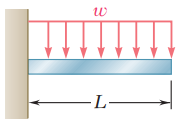

Analisando pela esquerda e considerando o carregamento como positivo para baixo e que a viga está apoiada na extremidade esquerda:<br>

Trecho 1 $(0 \leq x \leq a)$:<br>
$V(x) = Q_{i}$<br>
$M(x) = Q_{i}\cdot x - M_{i}$<br>

Trecho 2 $(a < x \leq L)$:<br>
$V(x) = Q_{i} - P$<br>
$M(x) = Q_{i}\cdot x - M_{i} - P\cdot (x-a)$<br>

Onde:
* $Q-{i}$ é a força cortante no início da viga, correspondente à reação vertical no apoio; <br>
* $M_{i}$ é o momento no início da viga, correspondete à reação momento no apoio.

In [27]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

#==============================================================================
#CÁLCULO DE ESFORÇOS INTERNOS - VIGA EM BALANÇO - CARGA CONCENTRADA NO VÃO
#==============================================================================
def Esforcos_Internos_V_bal_Carga_Concentrada(L,P, a, npartes):
    #------------------------------------------------
    #Reações de apoio
    R1y= P
    RM1z= P*a
    #------------------------------------------------
    #Construção dos vetores de posições
    npontos=round(npartes/2)+1
    x_trecho_1=np.linspace(0,a,npontos)
    x_trecho_2=np.linspace(a,L,npontos)
    x=np.concatenate((x_trecho_1,x_trecho_2))

    #------------------------------------------------
    #Cálculo dos esforços internos
    M_trecho1=np.zeros(x_trecho_1.shape[0])
    V_trecho1=np.zeros(x_trecho_1.shape[0])
    M_trecho2=np.zeros(x_trecho_2.shape[0])
    V_trecho2=np.zeros(x_trecho_2.shape[0])
    for i in range(x_trecho_1.shape[0]):
        M_trecho1[i]=-RM1z+R1y*x_trecho_1[i]
        V_trecho1[i]=R1y
    for i in range(x_trecho_2.shape[0]):
        M_trecho2[i]=-RM1z+R1y*x_trecho_2[i]-P*(x_trecho_2[i]-a)
        V_trecho2[i]=R1y-P
    M=np.concatenate((M_trecho1,M_trecho2))
    V=np.concatenate((V_trecho1,V_trecho2))

    return x, M, V

#==============================================================================
#DESENHO DOS DIAGRAMAS
#==============================================================================
def Diagrama_Esforcos_Internos(x, M, V, titulo_grafico, titulo_x, titulo_y):
    #------------------------------------------------
    #Criação do gráfico
    fig = go.Figure()
    
    #------------------------------------------------
    #Construção do diagrama de momento fletor
    fig.add_trace(go.Scatter(x = x, y = M,name = 'Momento Fletor (kNm)',          # Entrada de dados: x = vetor de coordenadas x; y = vetor de momentos fletores, name = nome do diagrama
    line = dict(color = 'rgb(0, 200, 200)'),                                        # Estilo do diagrama: color = cor da linha
                            mode = 'lines', line_shape = "linear",fill='tozeroy',)) # Modo do diagrama: lines = tipo de traço; line_shape = forma da linha; fill = mode de preenchimento

    fig.add_trace(go.Scatter(x = x, y = V,name = 'Esforço Cortante (kNm',          # Entrada de dados: x = vetor de coordenadas x; y = vetor de momentos fletores, name = nome do diagrama
    line = dict(color = 'rgb(200, 0, 200)'),                                        # Estilo do diagrama: color = cor da linha
                            mode = 'lines', line_shape = "linear",fill='tozeroy',))


    #------------------------------------------------
    #Configuração do layout do gráfico
    fig.update_layout(
        plot_bgcolor = 'white',showlegend=True,                                     #plot_bgcolor = cor de fundo do gráfico; showlegend = mostrar legenda;
        font = {'family': 'Arial','size': 12,'color': 'black'},                     # font = configuração das fontes; family = estilo da fonte; size = tamanho da fonte; color = cor da fonte
        title=titulo_grafico,                                     # title = título do gráfico
        xaxis_title=titulo_x,                                                        # xaxis_title = título do eixo x
        yaxis_title=titulo_y,                                             # yaxis_title = título do eixo y 
    )
    #------------------------------------------------
    #Exibição do gráfico
    fig.show()

#==============================================================================
#CÁLCULO DE ESFORÇOS INTERNOS - VIGA EM BALANÇO - CARGA CONCENTRADA NO VÃO
#==============================================================================
def Esforcos_Internos_V_bal_Carga_Distribuida_Uniforme(L,q, npartes):
    a=L/2
    #------------------------------------------------
    #Reações de apoio
    R1y= q*L
    RM1z= (q*L**2)/2
    #------------------------------------------------
    #Construção dos vetores de posições
    npontos=round(npartes/2)+1
    x_trecho_1=np.linspace(0,a,npontos)
    x_trecho_2=np.linspace(a,L,npontos)
    x=np.concatenate((x_trecho_1,x_trecho_2))

    #------------------------------------------------
    #Cálculo dos esforços internos
    M_trecho1=np.zeros(x_trecho_1.shape[0])
    V_trecho1=np.zeros(x_trecho_1.shape[0])
    M_trecho2=np.zeros(x_trecho_2.shape[0])
    V_trecho2=np.zeros(x_trecho_2.shape[0])
    for i in range(x_trecho_1.shape[0]):
        M_trecho1[i]=-RM1z+R1y*x_trecho_1[i]-q*(x_trecho_1[i]**2)/2
        V_trecho1[i]=R1y-q*x_trecho_1[i]
    for i in range(x_trecho_2.shape[0]):
        M_trecho2[i]=-RM1z+R1y*x_trecho_2[i]-q*(x_trecho_2[i]**2)/2
        V_trecho2[i]=R1y-q*x_trecho_2[i]
    M=np.concatenate((M_trecho1,M_trecho2))
    V=np.concatenate((V_trecho1,V_trecho2))

    return x, M, V

#### Exemplo 1

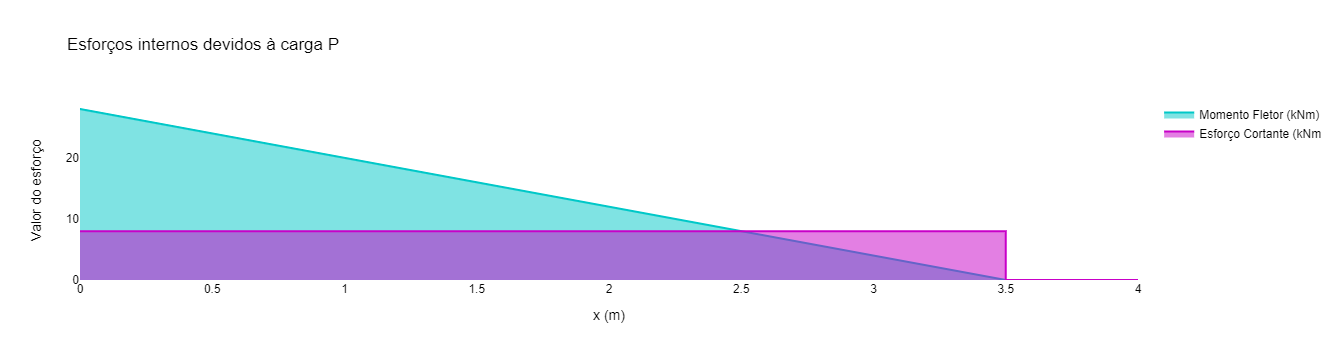

,x (m),M (kNm),V (kN)
0,0.0,-28.0,8.0
1,0.7,-22.4,8.0
2,1.4,-16.8,8.0
3,2.1,-11.2,8.0
4,2.8,-5.6,8.0
5,3.5,0.0,8.0
6,3.5,0.0,0.0
7,3.6,0.0,0.0
8,3.7,0.0,0.0
9,3.8,0.0,0.0


In [46]:
#==============================================================================
#ANÁLISE DE ESFORÇOS INTERNOS - VIGA EM BALANÇO - CARGA CONCENTRADA NO VÃO
#==============================================================================

#------------------------------------------------
#1) Entrada de dados (pré-processamento)
#1.1) geometria da viga
L = 4

#1.2) Carregamentos
P = 8
a = 3.5


#1.3) Discretização da barra
npartes = 10


#------------------------------------------------
#2) Cálculo (processamento)
#2.1) Pontos de cálculo
x = Esforcos_Internos_V_bal_Carga_Concentrada(L,P, a, npartes)[0]

#2.2) Cálculo dos esforços internos
M = Esforcos_Internos_V_bal_Carga_Concentrada(L,P, a, npartes)[1]
V = Esforcos_Internos_V_bal_Carga_Concentrada(L,P, a, npartes)[2]

#------------------------------------------------
#3) Saída de dados (pós-processamento)
Diagrama_Esforcos_Internos(x, -M, V, 'Esforços internos devidos à carga P', 'x (m)', 'Valor do esforço')

df=pd.DataFrame({'x (m)':x,'M (kNm)':M,'V (kN)':V})

df



In [45]:
list('r1','r2','r3','r4')

TypeError: list expected at most 1 argument, got 4

### Viga com carga distribuída uniformemente no vão
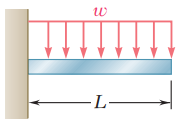

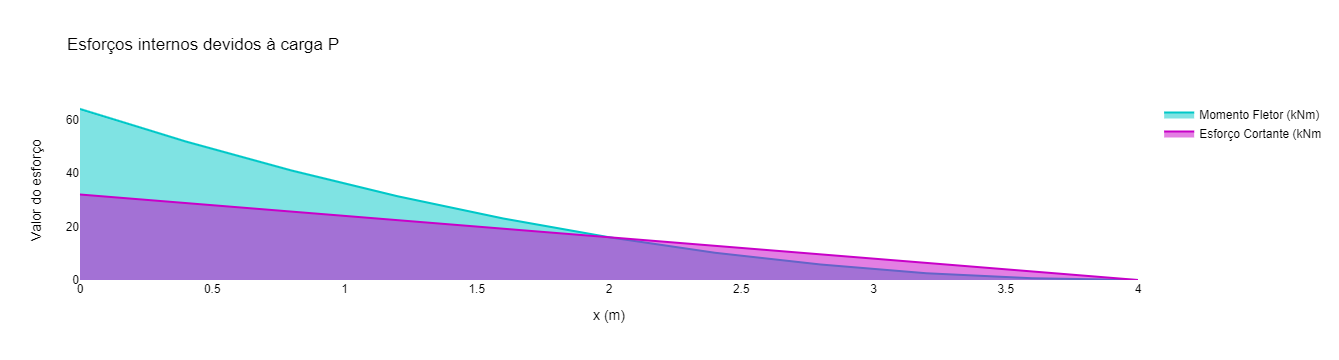

,x (m),M (kNm),V (kN)
0,0.0,-64.00,32.0
1,0.4,-51.84,28.8
2,0.8,-40.96,25.6
3,1.2,-31.36,22.4
4,1.6,-23.04,19.2
5,2.0,-16.00,16.0
6,2.0,-16.00,16.0
7,2.4,-10.24,12.8
8,2.8,-5.76,9.6
9,3.2,-2.56,6.4


In [30]:
#==============================================================================
#ANÁLISE DE ESFORÇOS INTERNOS - VIGA EM BALANÇO - CARGA CONCENTRADA NO VÃO
#==============================================================================

#------------------------------------------------
#1) Entrada de dados (pré-processamento)
#1.1) geometria da viga
L = 4
#1.2) Carregamentos
q = 8
#1.3) Discretização da barra
npartes = 10
#------------------------------------------------
#2) Cálculo (processamento)
#2.1) Pontos de cálculo
x = Esforcos_Internos_V_bal_Carga_Distribuida_Uniforme(L,q, npartes)[0]
#2.2) Cálculo dos esforços internos
M = Esforcos_Internos_V_bal_Carga_Distribuida_Uniforme(L,q, npartes)[1]
V = Esforcos_Internos_V_bal_Carga_Distribuida_Uniforme(L,q, npartes)[2]

#------------------------------------------------
#3) Saída de dados (pós-processamento)
Diagrama_Esforcos_Internos(x, -M, V, 'Esforços internos devidos à carga P', 'x (m)', 'Valor do esforço')
df = pd.DataFrame({'x (m)':x,'M (kNm)':M,'V (kN)':V})
df


### Viga com carga triangular no vão

### Princípio da superposição de efeitos

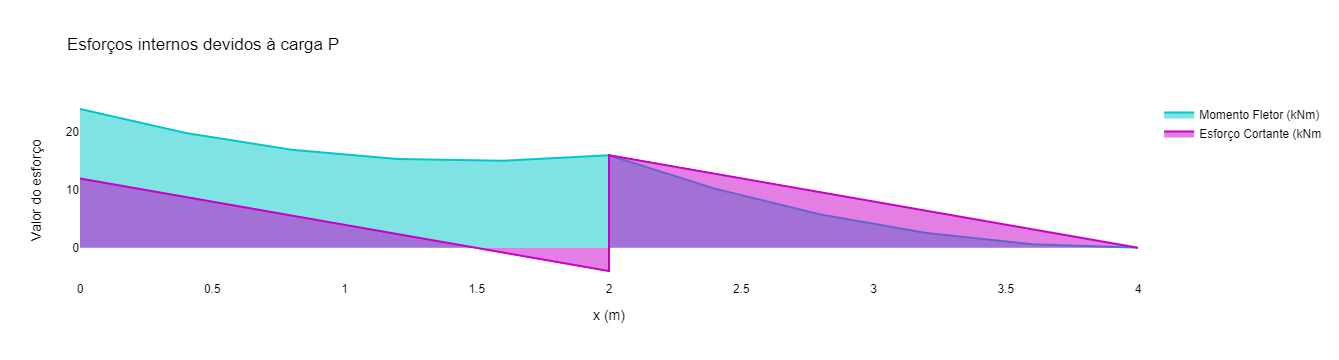

,x (m),M (kNm),V (kN)
0,0.0,-24.00,12.0
1,0.4,-19.84,8.8
2,0.8,-16.96,5.6
3,1.2,-15.36,2.4
4,1.6,-15.04,-0.8
5,2.0,-16.00,-4.0
6,2.0,-16.00,16.0
7,2.4,-10.24,12.8
8,2.8,-5.76,9.6
9,3.2,-2.56,6.4


In [32]:
#==============================================================================
#ANÁLISE DE ESFORÇOS INTERNOS - VIGA EM BALANÇO - CARGA CONCENTRADA NO VÃO
#==============================================================================

#------------------------------------------------
#1) Entrada de dados (pré-processamento)
#1.1) geometria da viga
L = 4

#1.2) Carregamentos
#1.2.1)
P = -20
a = 2

#1.2.2)
q = 8

#1.3) Discretização da barra
npartes = 10

#------------------------------------------------
#2) Cálculo (processamento)
#2.1) Pontos de cálculo
x = Esforcos_Internos_V_bal_Carga_Concentrada(L,P, a, npartes)[0]

#2.2) Cálculo dos esforços internos
#2.2.1)
M1 = Esforcos_Internos_V_bal_Carga_Concentrada(L,P, a, npartes)[1]
V1 = Esforcos_Internos_V_bal_Carga_Concentrada(L,P, a, npartes)[2]

#2.2.2)
M2 = Esforcos_Internos_V_bal_Carga_Distribuida_Uniforme(L,q, npartes)[1]
V2 = Esforcos_Internos_V_bal_Carga_Distribuida_Uniforme(L,q, npartes)[2]

#3) Combinação de carregamentos
M = M1+M2
V = V1+V2
#------------------------------------------------
#4) Saída de dados (pós-processamento)
Diagrama_Esforcos_Internos(x, -M, V, 'Esforços internos devidos à carga P', 'x (m)', 'Valor do esforço')
df=pd.DataFrame({'x (m)':x,'M (kNm)':M,'V (kN)':V})
df

#### Exemplo 4: Viga com duas cargas concentradas no vão

#### Exemplo 5: Viga com uma cargas distribuída uniformente e cargas concentradas no vão

#### Exemplo 6: Viga com várias cargas distribuídas no vão

#### Exemplo 7: Viga com uma carga triangular e uma carga concentrada no vão

#### Exemplo 8: Viga com carga trapezoidal

#### Exemplo 9: Viga com cargas distribuídas uniformente e carga trapezoidal no vão

#### Exemplo 10: Viga com diversas cargas no vão

## Vigas simplesmente apoiadas

#### Viga com carga distribuída uniformemente no vão

In [ ]:
import handcalcs.render
import forallpeople as si
si.environment('structural', top_level=True)
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
cm=si.m/100

In [ ]:
%%render 2
L=4*m
q=8*kN/m
R_2y= q*L/2
R_1y= q*L-R_2y


## Vigas simplesmente apoiadas

#### Carga distribuída uniformemente ao longo de toto o vão

In [ ]:
#Dados de entrada
L=4 #m
q=8 #kN/m

#Reações de apoio
R2y= q*L/2
R1y= q*L-R2y

#Construção dos vetores de dados
npartes=50
npontos=npartes+1
x=np.linspace(0,float(L),npontos)

#Momento fletor
M=np.zeros(npontos)
for i in range(npontos):
    M[i]=R1y*x[i]-(q*x[i]**2)/2

#Esforço cortante
V=np.zeros(npontos)
for i in range(npontos):
    V[i]=R1y-q*x[i]

#Diagramas
import pandas as pd
import plotly.graph_objects as go
df = pd.DataFrame(
    {
        "x":x,
        "Momento fletor":-M, "Esforço cortante":V
    }
)
fig = go.Figure()
fig.add_trace(go.Scatter(x = x, y = -M, name = 'Momento fletor (kN*m)',
                        line = dict(color = 'rgb(0, 200, 200)'),
                        mode = 'lines', line_shape = "linear",fill='tozeroy',))
fig.add_trace(go.Scatter(x = x, y = V, name = 'Esforço cortante (kN)',
                        line = dict(color = 'rgb(200, 0, 200)'),
                        mode = 'lines', line_shape = "linear",fill='tozeroy',))
fig.update_layout(plot_bgcolor = 'white',showlegend=True,
    font = {'family': 'Arial','size': 12,'color': 'black'},
    title='Diagramas de esforços internos',
    xaxis_title='x (m)',
    yaxis_title='Valor do esforço',
)
fig.add_shape(type = "line", x0 = 0, y0 = 0, x1 = L, y1 = 0, fillcolor = "black",line = dict(color = "black",width = 2,))
fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray',showline=True, linewidth=1, linecolor='black',)
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray',showline=True, linewidth=1, linecolor='black',)
fig.show()


#### Carga trapezoidal

In [ ]:
#Dados de entrada
L=4 #m
q1=8 #kN/m
q2=4 #kN/m

#Reações de apoio
R2y= q*L/2
R1y= q*L-R2y

#Construção dos vetores de dados
npartes=50
npontos=npartes+1
x=np.linspace(0,float(L),npontos)

#Momento fletor
M=np.zeros(npontos)
for i in range(npontos):
    M[i]=R1y*x[i]-(q*x[i]**2)/2

#Esforço cortante
V=np.zeros(npontos)
for i in range(npontos):
    V[i]=R1y-q*x[i]


#Diagramas
import pandas as pd
import plotly.graph_objects as go
df = pd.DataFrame(
    {
        "x":x,
        "Momento fletor":-M, "Esforço cortante":V
    }
)
fig = go.Figure()
fig.add_trace(go.Scatter(x = x, y = -M, name = 'Momento fletor (kN*m)',
                        line = dict(color = 'rgb(0, 200, 200)'),
                        mode = 'lines', line_shape = "linear",fill='tozeroy',))
fig.add_trace(go.Scatter(x = x, y = V, name = 'Esforço cortante (kN)',
                        line = dict(color = 'rgb(200, 0, 200)'),
                        mode = 'lines', line_shape = "linear",fill='tozeroy',))
fig.update_layout(plot_bgcolor = 'white',showlegend=True,
    font = {'family': 'Arial','size': 12,'color': 'black'},
    title='Diagramas de esforços internos',
    xaxis_title='x (m)',
    yaxis_title='Valor do esforço',
)
fig.add_shape(type = "line", x0 = 0, y0 = 0, x1 = L, y1 = 0, fillcolor = "black",line = dict(color = "black",width = 2,))
fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray',showline=True, linewidth=1, linecolor='black',)
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray',showline=True, linewidth=1, linecolor='black',)
fig.show()

#### Carga concentrada no vão

In [ ]:
#Dados de entrada
L=float(4) #m
a = 2 #m
P=8.4 #kN
bw=12 #cm
h=30 #cm
E=13 #GPa

#Propriedades geométricas da seção
Ix=(10*bw)*(10*h)**3/12 #cm4


#Reações de apoio
b = L-a
R1y= P*b/L
R2y= P*a/L


#Construção dos vetores de dados
npartes=10
npontos=npartes+1
x_trecho_1=np.linspace(0,a,npontos)
x_trecho_2=np.linspace(a,L,npontos)
x=np.concatenate((x_trecho_1,x_trecho_2))

#Momento fletor
M_trecho1=np.zeros(npontos)
M_trecho2=np.zeros(npontos)
for i in range(npontos):
    M_trecho1[i]=R1y*x_trecho_1[i]
    M_trecho2[i]=R1y*x_trecho_2[i]-P*(x_trecho_2[i]-a)
M=np.concatenate((M_trecho1,M_trecho2))

#Esforço cortante
V_trecho1=np.zeros(npontos)
V_trecho2=np.zeros(npontos)
for i in range(npontos):
    V_trecho1[i]=R1y
    V_trecho2[i]=R1y-P
V=np.concatenate((V_trecho1,V_trecho2))

#Curva elástica
E=E*(10**9) #N/m2
I=Ix*(10**-8) #m4
v_trecho1=np.zeros(npontos)
v_trecho2=np.zeros(npontos)
v_a = -1000*P*((1000*a)**2)*((1000*b)**2)/(3*1000*E*I*1000*L)
for i in range(npontos):
    v_trecho1[i]=(1000*P*1000*b/(6*1000*E*I*1000*L))*((1000*x_trecho_1[i])**3 - ((1000*L)**2 - (1000*b)**2)*1000*x_trecho_1[i])
    v_trecho2[i]=(1000*P*1000*a/(6*1000*E*I*1000*L))*((1000*x_trecho_2[npontos-i-1])**3 - ((1000*L)**2 - (1000*a)**2)*1000*x_trecho_2[npontos-i-1])+v_a

v=np.concatenate((v_trecho1,v_trecho2)) #m


#Diagramas
import pandas as pd
import plotly.graph_objects as go
df = pd.DataFrame(
    {
        "x":x,
        "Momento fletor":-M, "Esforço cortante":V
    }
)
fig = go.Figure()
fig.add_trace(go.Scatter(x = x, y = -M, name = 'Momento fletor (kN*m)',
                        line = dict(color = 'rgb(0, 200, 200)'),
                        mode = 'lines', line_shape = "linear",fill='tozeroy',))
fig.add_trace(go.Scatter(x = x, y = V, name = 'Esforço cortante (kN)',
                        line = dict(color = 'rgb(200, 0, 200)'),
                        mode = 'lines', line_shape = "linear",fill='tozeroy',))
fig.add_trace(go.Scatter(x = x, y = 10*v, name = 'Linha elástica',
                        line = dict(color = 'rgb(255, 0, 0)'),
                        mode = 'lines',))
fig.update_layout(plot_bgcolor = 'white',showlegend=True,
    font = {'family': 'Arial','size': 12,'color': 'black'},
    title='Diagramas de esforços internos',
    xaxis_title='x (m)',
    yaxis_title='Valor do esforço',
)
fig.add_shape(type = "line", x0 = 0, y0 = 0, x1 = L, y1 = 0, fillcolor = "black",line = dict(color = "black",width = 2,))
fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray',showline=True, linewidth=1, linecolor='black',)
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray',showline=True, linewidth=1, linecolor='black',)
fig.show()